# ARIMA Model and Time Series Forecasting
## What is ARIMA?
***ARIMA*** is the abbreviation for Auto Regressive Integrated Moving Average.

    "AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.  
    I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.  
    MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations."(Jason Brownlee, 2017)  

It is a kind of statistical model that determines different kinds of standard temporal structures in time series data. There are serveral different parameters used in an ARIMA model. A standard notation is "ARIMA(p,d,q)"; these parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.  

    "p: The number of lag observations included in the model, also called the lag order.  
    d: The number of times that the raw observations are differenced, also called the degree of differencing.  
    q: The size of the moving average window, also called the order of moving average."(Jason Brownlee, 2017)  
After that, data is pre-processed by a degree of difference to make it stationary(remove trend and periodic characteristics that negatively affect the model).  
When a parameter is 0, this means that element of the model is not used. By doing this, the ARIMA model can be configured to perform the functions of an ARMA, AR, I, or MA model.  
The model assumes that the used dataset is an ARIMA process and this assumption to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.  

## What is Time Series?
A ***Time Series*** is a dataset that is indexed in a timely order. The time order can be seconds, minutes, or daily.

## This notebook is written in Python 3.9.2 and shows the following contents:  
1, Explanations of ARIMA model's parameters and assumptions.  
2, Fitting the model to a set of Time Series data and use the model to forecast.  
3, Different configurations of the model.  

C:\Users\ps\Desktop\Github
Month
2001-01    266.0
2001-02    145.9
2001-03    183.1
2001-04    119.3
2001-05    180.3
Freq: M, Name: Sales, dtype: float64


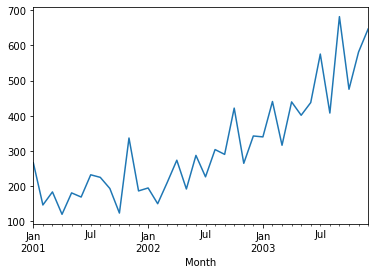

In [15]:
%cd "C:\Users\ps\Desktop\Github"
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#This function uses the input x to form the date lables
def date_generator(x):
	return datetime.strptime('200'+x, '%Y-%m')

dataset = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=date_generator)
dataset.index = dataset.index.to_period('M')
print(dataset.head(5))
dataset.plot()
plt.show()

The plot above shows that the Shampoo Sales dataset has a clear trend, which is an up-ward moving trend.  
If there is a trend, then the time series is not stationary, next pre-processing methods will be used to make it stationary.

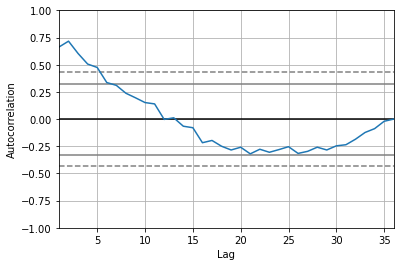

In [4]:
autocorrelation_plot(dataset)
plt.show()

From the above grapph, we can see that there is a positive correlation coefficient within the first 10 lags. This maybe significant for the first 10 lags. We will start to use the AR parameter of 5 because it is close to the average correlation coefficient.  
The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA is part of the "statsmodels" library and initialized by follows steps:  

    1, Initialize the model by using ARIMA() method and filling in the p, d, and q parameters into the () respectively.  
    2, The model will start to fit when the fit() method is executed.  
    3, Predictions are made by using the predict() method with specification of the time indexes of the times one wants to perdict.  
The following code will fit the ARIMA model to the entire Shampoo Sales dataset and shows the residual errors.  

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.  

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 18 Jan 2022   AIC                            408.969
Time:                        23:03:25   BIC                            418.301
Sample:                    01-31-2001   HQIC                           412.191
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

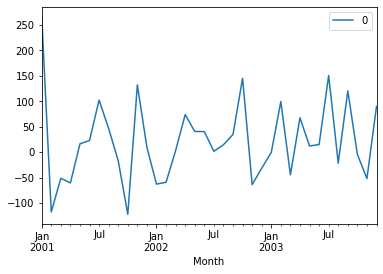

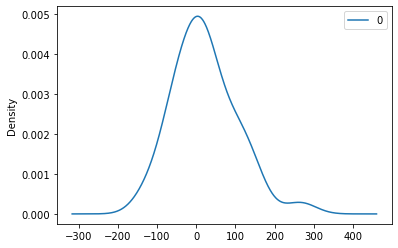

                0
count   36.000000
mean    21.936145
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [9]:
# fit model
model = ARIMA(dataset, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

## Rolling Forecast ARIMA Model
### The ARIMA model can be used to forecast future time steps.  

1, Use the predict() attribute of the "ARIMAResults" object to make predictions. It uses the index of the time steps to make predictions. 

2, If 50 observations in the training dataset to fit the model, then the index of the next time step or to make a prediction would be  start=51, end=51 in the perdict() attribute. The return is an one element array containing the prediction.  

3, As we have pre-processed the data, we want the perdictions to be in the same scale. As we performed a differencing (d>0 when configuring the model), this can be accommodated by setting the typ argument to the value ‘levels’(typ=’levels’).  

### Alternately, avoid these specifications by using the forecast() attribute, which automaticlly performs a one-step-forward perdiction.  

1, To start this process, the one dataset will be splitted into training and test sets; the train set is used to fit the model, and generate a prediction for each element on the test set.  

"2, A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received."(Jason Brownlee, 2017)  

3, All observations are stored in a list varibale called "obs_list" in whitch has the training data and appending every new observation.

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


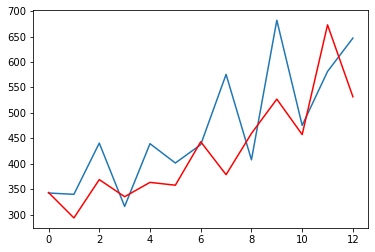

In [16]:
data = dataset.values
size = int(len(data) * 0.66)
train, test = data[0:size], data[size:len(data)]
history = [data for data in train]
predictions = []
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### The model could use further tuning of the p, d, and maybe even the q parameters.

## Configuring an ARIMA Model
The most commonly used method for fitting an ARIMA model is the Box-Jenkins Methodology.  
"This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.The process was described in the classic 1970 textbook on the topic titled Time Series Analysis: Forecasting and Control by George Box and Gwilym Jenkins. An updated 5th edition is now available if you are interested in going deeper into this type of model and methodology."(Jason Brownlee, 2017)

### Box-Jenkins Methodology is as follows:

"1, ***Model Identification*** Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.  
2, ***Parameter Estimation*** Use a fitting procedure to find the coefficients of the regression model.  
3, ***Model Checking*** Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model."(Jason Brownlee, 2017)  

Repeat this process until the model's errors on the in-sample(training) or out-of-sample(testing) observations are meeting one's expectations.

Citations:  
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/